<a href="https://colab.research.google.com/github/sgevatschnaider/machine-learning/blob/main/notebooks/es/Random_forest_e_hiperpar%C3%A1metros_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importación de librerías necesarias
from IPython.display import display, HTML
import html

# =========================================================
# 1. BLOQUES HTML ESTÁTICOS
# =========================================================

introduction_trees_html = r"""
<div class="content-block">
    <h2>Definición y Fundamento</h2>
    <p>Un <strong>árbol de decisión</strong> es un modelo de aprendizaje supervisado no paramétrico utilizado tanto para clasificación como para regresión. Su estructura se asemeja a un diagrama de flujo, donde cada nodo interno representa una prueba sobre un atributo (una "pregunta"), cada rama representa el resultado de la prueba, y cada nodo hoja representa una etiqueta de clase (en clasificación) o un valor continuo (en regresión). El modelo particiona recursivamente el espacio de características en regiones homogéneas con respecto a la variable objetivo, creando un conjunto de reglas <strong>if-then-else</strong> altamente interpretables.</p>
</div>
"""

conclusion_trees_html = r"""
<div class="content-block">
    <h2>Conclusión y Perspectiva</h2>
    <p>Los árboles de decisión son una piedra angular del Machine Learning, valorados por su excepcional interpretabilidad y facilidad de uso. Si bien un solo árbol puede ser propenso al sobreajuste, sirve como el bloque de construcción fundamental para algunos de los algoritmos de ensamble más potentes y precisos que existen, como <strong>Random Forest</strong> y <strong>Gradient Boosting Machines</strong> (XGBoost, LightGBM).</p>
    <p>Dominar los árboles de decisión no solo proporciona una herramienta predictiva útil, sino que también sienta las bases para comprender técnicas de modelado más complejas. Su aplicabilidad en problemas con datos estructurados (tabulares) los mantiene como una opción relevante y de primera línea en innumerables aplicaciones industriales, desde la evaluación de riesgo crediticio hasta el diagnóstico médico y la optimización de campañas de marketing.</p>
</div>
"""

# =========================================================
# 2. DATOS PARA TARJETAS DESPLEGABLES (CONTENIDO PROFESIONAL)
# =========================================================
decision_tree_cards_data = [
    {
        "titulo": r"1. Criterios de División: Medición de la Pureza",
        "contenido": r"""
            <p>El núcleo de un árbol de decisión es el algoritmo para seleccionar el mejor atributo y el mejor umbral para dividir un nodo. El objetivo es que las divisiones resultantes sean lo más "puras" posible, es decir, que los nodos hijos contengan mayoritariamente muestras de una sola clase. Para medir esto, se utilizan principalmente dos criterios:</p>

            <h4>Índice de Gini (Impureza de Gini)</h4>
            <p>Mide la probabilidad de que una muestra seleccionada al azar sea clasificada incorrectamente si se etiquetara aleatoriamente según la distribución de clases en el nodo. Un valor de 0 indica pureza total (todas las muestras pertenecen a una sola clase).</p>
            <div class="formula-block">$$ \text{Gini}(p) = 1 - \sum_{i=1}^{k} (p_i)^2 $$</div>
            <p>Donde \(p_i\) es la proporción de muestras de la clase \(i\) en el nodo. Es computacionalmente más rápido que la entropía porque no requiere cálculos de logaritmos.</p>

            <h4>Entropía y Ganancia de Información</h4>
            <p>Basado en la teoría de la información, la entropía mide el nivel de desorden o incertidumbre en un nodo.</p>
            <div class="formula-block">$$ \text{Entropía}(p) = - \sum_{i=1}^{k} p_i \log_2(p_i) $$</div>
            <p>El algoritmo busca la división que maximice la <strong>Ganancia de Información</strong>, que es la reducción de la entropía después de la división. Una variante, el <strong>Gain Ratio</strong>, ajusta la ganancia de información para penalizar atributos con una gran cantidad de valores únicos, que tienden a ser favorecidos injustamente.</p>
        """
    },
    {
        "titulo": r"2. El Proceso de Construcción Recursiva del Árbol",
        "contenido": r"""
            <p>Un árbol se construye de arriba hacia abajo siguiendo un proceso de particionamiento recursivo:</p>
            <ol>
                <li><strong>Inicio en el Nodo Raíz:</strong> Se comienza con el conjunto de datos completo en el nodo raíz y se calcula su impureza inicial (Gini o Entropía).</li>
                <li><strong>Evaluación de Divisiones:</strong> Para cada atributo, el algoritmo evalúa todas las divisiones posibles (para atributos numéricos, se consideran umbrales entre valores únicos; para categóricos, se evalúan subconjuntos de categorías).</li>
                <li><strong>Selección de la Mejor División:</strong> Se elige el atributo y el umbral que resulten en la mayor ganancia de información (o la menor impureza ponderada en los nodos hijos). Esta se convierte en la regla de decisión para el nodo actual.</li>
                <li><strong>Creación de Nodos Hijos:</strong> El conjunto de datos se divide según la regla seleccionada, y cada subconjunto se envía a un nuevo nodo hijo.</li>
                <li><strong>Recursión y Condiciones de Parada:</strong> El proceso se repite para cada nodo hijo. La recursión se detiene si se cumple alguna de las siguientes condiciones (hiperparámetros):
                    <ul>
                        <li>El nodo es puro (contiene muestras de una sola clase).</li>
                        <li>Se ha alcanzado la <strong>profundidad máxima</strong> (<code>max_depth</code>) del árbol.</li>
                        <li>El número de muestras en el nodo es inferior al <strong>mínimo requerido para dividir</strong> (<code>min_samples_split</code>).</li>
                        <li>El número de muestras en un nodo hoja resultante sería inferior al <strong>mínimo requerido en una hoja</strong> (<code>min_samples_leaf</code>).</li>
                    </ul>
                </li>
            </ol>
            <p>En el ejemplo de las polillas, variables como "masa" y "envergadura" son evaluadas para determinar qué umbral (ej. "masa < 750mg") separa mejor las especies en cada paso.</p>
        """
    },
    {
        "titulo": r"3. Random Forest: La Potencia del Ensamble",
        "contenido": r"""
            <h4>Definición y Motivación</h4>
            <p>Un <strong>Random Forest</strong> (Bosque Aleatorio) es un método de aprendizaje por ensamble que opera construyendo una multitud de árboles de decisión durante el entrenamiento y generando la clase que es la moda de las clases (clasificación) o la predicción media (regresión) de los árboles individuales.</p>
            <p>La motivación principal es superar la principal debilidad de un árbol de decisión único: su <strong>alta varianza</strong>, es decir, su tendencia a sobreajustarse a los datos de entrenamiento.</p>

            <h4>Mecanismo de Funcionamiento</h4>
            <p>Random Forest introduce aleatoriedad a través de dos mecanismos clave:</p>
            <ol>
                <li><strong>Bootstrap Aggregating (Bagging):</strong> Cada árbol del bosque se entrena en una muestra diferente del conjunto de datos original. Estas muestras se obtienen mediante un proceso de muestreo con reemplazo (bootstrap). Esto asegura que los árboles sean diferentes entre sí.</li>
                <li><strong>Aleatoriedad de Atributos (Feature Bagging):</strong> Al decidir la división en cada nodo, el algoritmo no considera todos los atributos, sino una selección aleatoria de ellos (definido por el hiperparámetro <code>max_features</code>). Esto descorrela los árboles aún más, ya que evita que unos pocos atributos muy predictivos dominen la estructura de todos los árboles.</li>
            </ol>
            <p>La predicción final combina los resultados de todos los árboles: por <strong>votación mayoritaria</strong> en clasificación y por <strong>promedio</strong> en regresión.</p>

            <h4>Ventajas Clave sobre un Árbol Único</h4>
            <ul>
                <li><strong>Reducción drástica del sobreajuste</strong> y la varianza.</li>
                <li><strong>Mayor precisión y robustez</strong> general del modelo.</li>
                <li>Capacidad para estimar la importancia de las variables (feature importance).</li>
                <li>Manejo implícito de datos faltantes y tolerancia al ruido.</li>
            </ul>
        """
    },
    {
        "titulo": r"4. Configuración del Modelo: Parámetros vs. Hiperparámetros",
        "contenido": r"""
            <p>Es fundamental entender la diferencia entre los componentes que el modelo aprende y los que el analista define.</p>
            <h4>Hiperparámetros (Definidos por el Analista)</h4>
            <p>Son los ajustes de configuración del algoritmo que se establecen <strong>antes</strong> del proceso de entrenamiento. Controlan la arquitectura y el comportamiento del aprendizaje. Su ajuste óptimo (tuning) es crucial para el rendimiento del modelo.</p>
            <div class="table-container">
                 <table>
                    <thead><tr><th>Hiperparámetro</th><th>Descripción</th><th>Impacto</th></tr></thead>
                    <tbody>
                        <tr><td><strong><code>n_estimators</code></strong></td><td>Número de árboles a construir en el bosque (solo en Random Forest).</td><td>Más árboles suelen mejorar el rendimiento, pero con rendimientos decrecientes y mayor coste computacional.</td></tr>
                        <tr><td><strong><code>max_depth</code></strong></td><td>Profundidad máxima permitida para cada árbol.</td><td>Controla la complejidad. Un valor bajo previene el sobreajuste; uno alto permite capturar relaciones complejas.</td></tr>
                        <tr><td><strong><code>criterion</code></strong></td><td>La función para medir la calidad de una división ('gini' o 'entropy').</td><td>Gini es generalmente más rápido. Los resultados suelen ser muy similares.</td></tr>
                        <tr><td><strong><code>min_samples_split</code></strong></td><td>El número mínimo de muestras que un nodo debe tener para poder ser dividido.</td><td>Previene divisiones en nodos con muy pocas muestras, controlando el sobreajuste.</td></tr>
                        <tr><td><strong><code>max_features</code></strong></td><td>El número de características a considerar al buscar la mejor división.</td><td>Aumenta la diversidad de los árboles, reduciendo la varianza.</td></tr>
                    </tbody>
                </table>
            </div>

            <h4>Parámetros (Aprendidos por el Modelo)</h4>
            <p>Son los valores que el modelo <strong>aprende de los datos</strong> durante el entrenamiento. En un árbol de decisión, estos son las reglas de división internas que conforman su estructura.</p>
            <blockquote>Ejemplo: En la regla "si Masa < 750mg", el atributo "Masa" y el umbral "750mg" son parámetros aprendidos por el algoritmo al encontrar el punto de corte óptimo en los datos de entrenamiento.</blockquote>
        """
    },
    {
        "titulo": r"5. Visualización e Interpretación: Fronteras de Decisión",
        "contenido": r"""
            <h4>Fronteras de un Árbol de Decisión</h4>
            <p>Cada división en un árbol de decisión crea una frontera de decisión que es <strong>ortogonal a los ejes</strong> de las características. Por ejemplo, una regla como "Masa < 750" crea una línea horizontal en un gráfico 2D de Masa vs. Envergadura. El resultado es que el espacio de características se divide en una serie de rectángulos o hiperrectángulos.</p>
            <p>Esta naturaleza rectilínea hace que las fronteras de decisión de un solo árbol sean escalonadas y a veces poco naturales, especialmente si la verdadera separación entre clases es diagonal o curva.</p>

            <h4>Fronteras de un Random Forest</h4>
            <p>Al promediar las predicciones de cientos de árboles, cada uno con fronteras rectangulares ligeramente diferentes, un Random Forest crea una frontera de decisión final que es mucho <strong>más suave, flexible y robusta</strong>. Ya no está limitada a una simple estructura de "escalones", sino que puede aproximar formas mucho más complejas, lo que explica en gran medida su superior poder predictivo.</p>
        """
    }
]

# =========================================================
# 3. GENERADOR DE TARJETAS
# =========================================================
def generar_tarjetas_definiciones(datos):
    html_generado = []
    for seccion in datos:
        titulo_html = seccion['titulo']
        contenido_html = seccion['contenido']
        plantilla_seccion = f"""
        <div class="topic-card">
            <div class="topic-header">
                <span class="topic-title">{titulo_html}</span>
                <i class="fas fa-chevron-down expand-icon"></i>
            </div>
            <div class="topic-content">
                {contenido_html}
            </div>
        </div>
        """
        html_generado.append(plantilla_seccion)
    return "\n".join(html_generado)

contenido_dinamico_html = generar_tarjetas_definiciones(decision_tree_cards_data)

# =========================================================
# 4. PLANTILLA GLOBAL PROFESIONAL
# =========================================================
plantilla_profesional = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{main_title}</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700;800&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
  <script>
    window.MathJax = {{
      tex: {{
        inlineMath: [['$', '$'], ['\\(', '\\)']],
        displayMath: [['$$', '$$'], ['\\[', '\\]']],
        processEscapes: true,
        processEnvironments: true
      }},
      svg: {{
        fontCache: 'global'
      }}
    }};
  </script>
  <script src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js" id="MathJax-script" async></script>
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg, #004d40 0%, #00796b 100%);
      --bg-secondary: rgba(255, 255, 255, 0.9);
      --bg-tertiary: rgba(240, 245, 245, 0.95);
      --text-primary: #00251a;
      --text-secondary: #004d40;
      --text-light: #ffffff;
      --accent-primary: #00796b;
      --accent-secondary: #4db6ac;
      --accent-gradient: linear-gradient(135deg, var(--accent-primary) 0%, var(--accent-secondary) 100%);
      --border-color: rgba(200, 230, 201, 0.9);
      --shadow-card: 0 15px 35px rgba(45, 55, 72, 0.1);
      --border-radius: 20px;
      --transition: all 0.4s cubic-bezier(0.25, 0.8, 0.25, 1);
    }}
    [data-theme="dark"] {{
      --bg-primary: linear-gradient(135deg, #011a15 0%, #0a2f2b 100%);
      --bg-secondary: rgba(11, 41, 36, 0.85);
      --bg-tertiary: rgba(15, 53, 47, 0.8);
      --text-primary: #e0f2f1;
      --text-secondary: #b2dfdb;
      --accent-primary: #4db6ac;
      --accent-secondary: #80cbc4;
      --border-color: rgba(255, 255, 255, 0.15);
      --shadow-card: 0 15px 35px rgba(0, 0, 0, 0.2);
    }}
    * {{ margin: 0; padding: 0; box-sizing: border-box; }}
    html {{ scroll-behavior: smooth; }}
    body {{ font-family: 'Inter', sans-serif; line-height: 1.8; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; }}
    .particles {{ position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }}
    .particle {{ position: absolute; border-radius: 50%; animation: float 25s infinite linear; opacity: 0; background: rgba(255, 255, 255, 0.4);}}
    @keyframes float {{ 0% {{ transform: translateY(100vh) rotate(0deg); opacity: 0; }} 10%, 90% {{ opacity: 0.4; }} 100% {{ transform: translateY(-10vh) rotate(360deg); opacity: 0; }} }}

    .container {{ max-width: 1000px; margin: 0 auto; padding: 2rem; z-index: 1; }}
    .header {{ text-align: center; margin-bottom: 3rem; position: relative; }}
    .main-title {{ font-size: clamp(2.5rem, 5vw, 4.2rem); font-weight: 800; background: var(--accent-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; background-clip: text; text-shadow: 0 0 30px rgba(255,255,255,0.3); margin-bottom: 1rem; }}

    .theme-toggle {{ position: fixed; top: 2rem; right: 2rem; width: 60px; height: 60px; border: 1px solid var(--border-color); border-radius: 50%; background: var(--bg-secondary); backdrop-filter: blur(15px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.4rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; }}
    .theme-toggle:hover {{ transform: scale(1.15) rotate(180deg); }}

    .content-block {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); padding: 2rem; margin-bottom: 2rem; }}
    .content-block h2 {{ color: var(--text-primary); margin-bottom: 1.5rem; border-bottom: 2px solid var(--accent-primary); padding-bottom: 0.5rem; }}
    .content-block p, .content-block li {{ color: var(--text-secondary); margin-bottom: 1rem; }}
    .content-block ul {{ list-style-type: '→ '; padding-left: 20px; }}

    .lesson-container {{ display: flex; flex-direction: column; gap: 1.5rem; }}
    .topic-card {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); overflow: hidden; transition: var(--transition); }}
    .topic-header {{ cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }}
    .topic-title {{ font-size: 1.4rem; font-weight: 600; color: var(--text-primary); }}
    .expand-icon {{ font-size: 1.2rem; color: var(--text-secondary); transition: var(--transition); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); color: var(--accent-primary); }}
    .topic-content {{ max-height: 0; overflow: hidden; transition: max-height 1.8s cubic-bezier(0.25, 0.8, 0.25, 1), padding 1.8s cubic-bezier(0.25, 0.8, 0.25, 1); background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 4500px; padding: 2rem; border-top: 1px solid var(--border-color); }}

    .topic-content h4 {{ color: var(--text-primary); margin-top: 1.5rem; margin-bottom: 1rem; font-size: 1.2rem; border-left: 4px solid var(--accent-primary); padding-left: 1rem; }}
    .topic-content h4:first-child {{ margin-top: 0; }}
    .topic-content p, .topic-content li {{ color: var(--text-secondary); line-height: 1.7; }}
    .topic-content ul, .topic-content ol {{ padding-left: 25px; margin-bottom: 1rem; }}
    .topic-content ol li::marker {{ font-weight: bold; color: var(--accent-primary); }}
    .topic-content ul li::marker {{ color: var(--accent-primary); }}
    .topic-content strong {{ color: var(--text-primary); font-weight: 700; }}
    .topic-content blockquote {{ border-left: 4px solid var(--accent-secondary); padding-left: 1.5rem; margin: 1.5rem 0; font-style: italic; color: var(--text-secondary); background: rgba(127, 140, 141, 0.05); border-radius: 0 8px 8px 0; padding: 1rem 1.5rem; }}
    .formula-block {{ padding: 1.5rem; background: rgba(0, 0, 0, 0.1); border-radius: 10px; text-align: center; overflow-x: auto; margin: 1.5rem 0; color: var(--text-primary); border: 1px solid var(--border-color); }}
    .table-container {{ overflow-x: auto; margin: 1.5rem 0; border: 1px solid var(--border-color); border-radius: 10px; }}
    table {{ width: 100%; border-collapse: collapse; }}
    th, td {{ padding: 14px 18px; border: 1px solid var(--border-color); text-align: left; }}
    thead th {{ background-color: var(--bg-tertiary); color: var(--text-primary); font-weight: 600; border-top: 0; }}
    .MathJax {{ color: var(--text-primary) !important; }}

    footer {{ text-align: center; margin-top: 4rem; padding-top: 2rem; border-top: 1px solid var(--border-color); }}
    footer p {{ color: var(--text-secondary); font-size: 0.9rem; opacity: 0.8; }}
  </style>
</head>
<body data-theme="dark">
  <div class="particles" id="particles-container"></div>
  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>
  <div class="container">
    <header class="header">
      <h1 class="main-title">{main_title}</h1>
    </header>
    {introduction_html}
    <div class="lesson-container">
        {dynamic_content_html}
    </div>
    {conclusion_html}
    <footer>
      <p>{footer_text}</p>
    </footer>
  </div>
  <script>
    (function() {{
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;
        function setTheme(theme) {{
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) {{ themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }}
        }}
        // Default to light theme for this specific style
        const storedTheme = localStorage.getItem('theme');
        setTheme(storedTheme || 'light');

        themeToggleButton.addEventListener('click', () => {{
            const newTheme = (bodyEl.getAttribute('data-theme') || 'light') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        }});

        document.querySelectorAll('.topic-header').forEach(header => {{
            header.addEventListener('click', () => {{
                const card = header.parentElement;
                card.classList.toggle('open');
                if (window.MathJax && card.classList.contains('open')) {{
                    window.MathJax.typesetPromise([card]).catch(err => console.log('MathJax typeset error:', err));
                }}
            }});
        }});

        const container = document.getElementById('particles-container');
        if (container) {{
            for (let i = 0; i < 30; i++) {{
                const p = document.createElement('div');
                p.className = 'particle';
                p.style.left = Math.random() * 100 + 'vw';
                const size = (Math.random() * 5 + 2);
                p.style.width = size + 'px';
                p.style.height = size + 'px';
                p.style.animationDelay = Math.random() * -20 + 's';
                p.style.animationDuration = (15 + Math.random() * 10) + 's';
                p.style.opacity = 0.6;
                container.appendChild(p);
            }}
        }}

        window.addEventListener('load', () => {{
            if (window.MathJax) {{
                window.MathJax.typesetPromise().catch(err => console.log('Initial MathJax error:', err));
            }}
        }});
    }})();
  </script>
</body>
</html>
"""

# =========================================================
# 5. RENDER FINAL
# =========================================================
final_html = plantilla_profesional.format(
    main_title="Árboles de Decisión y Random Forest",
    introduction_html=introduction_trees_html,
    dynamic_content_html=contenido_dinamico_html,
    conclusion_html=conclusion_trees_html,
    footer_text="Material elaborado por prof. Sergio Gevatschnaider"
)

display(HTML(final_html))

Hiperparámetro,Descripción,Impacto
n_estimators,Número de árboles a construir en el bosque (solo en Random Forest).,"Más árboles suelen mejorar el rendimiento, pero con rendimientos decrecientes y mayor coste computacional."
max_depth,Profundidad máxima permitida para cada árbol.,Controla la complejidad. Un valor bajo previene el sobreajuste; uno alto permite capturar relaciones complejas.
criterion,La función para medir la calidad de una división ('gini' o 'entropy').,Gini es generalmente más rápido. Los resultados suelen ser muy similares.
min_samples_split,El número mínimo de muestras que un nodo debe tener para poder ser dividido.,"Previene divisiones en nodos con muy pocas muestras, controlando el sobreajuste."
max_features,El número de características a considerar al buscar la mejor división.,"Aumenta la diversidad de los árboles, reduciendo la varianza."


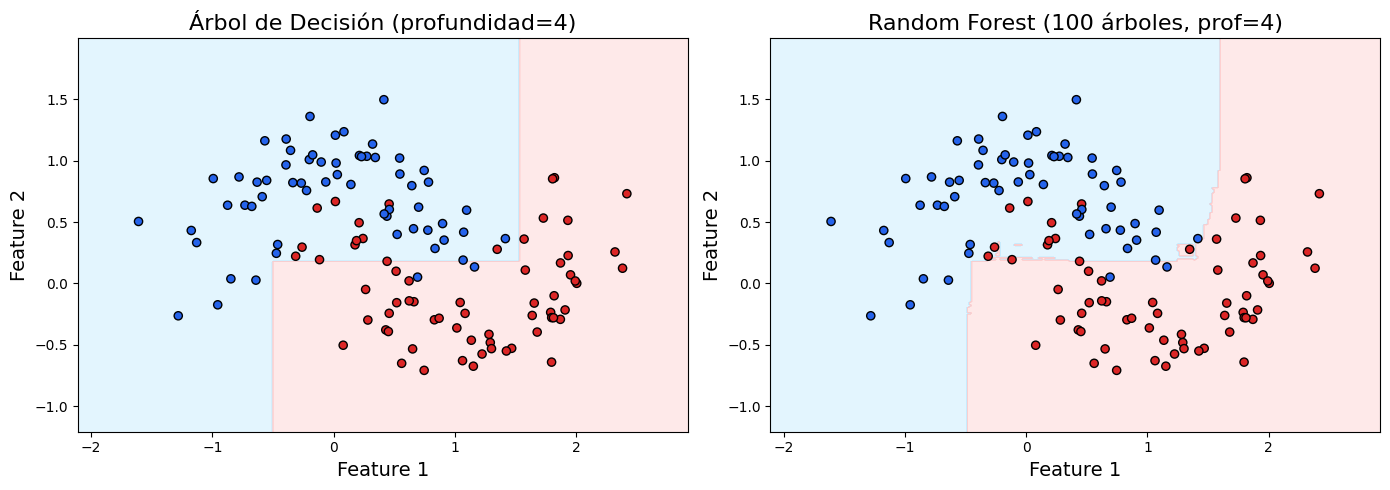

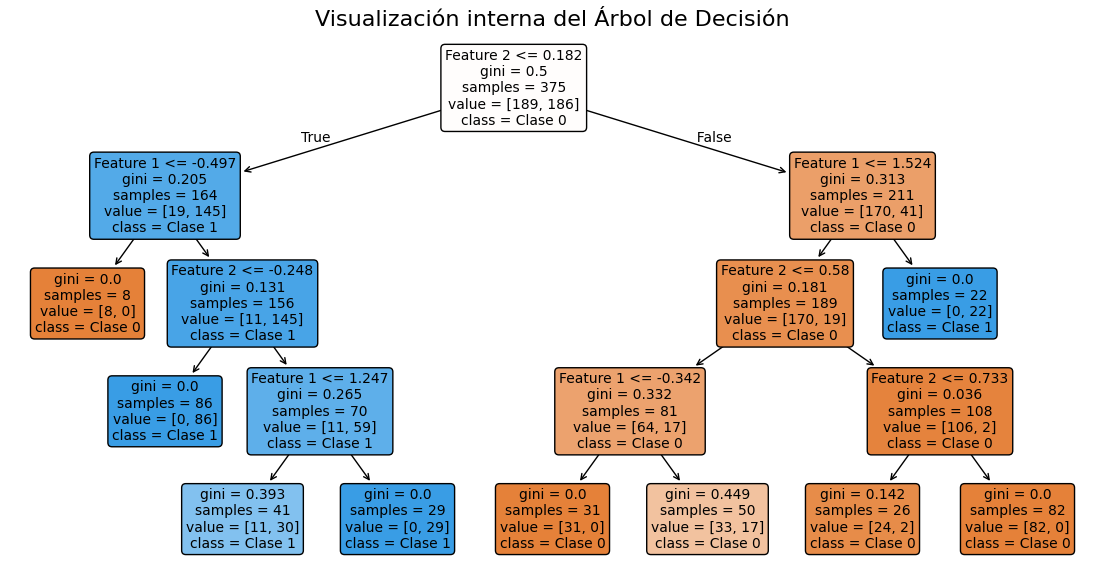

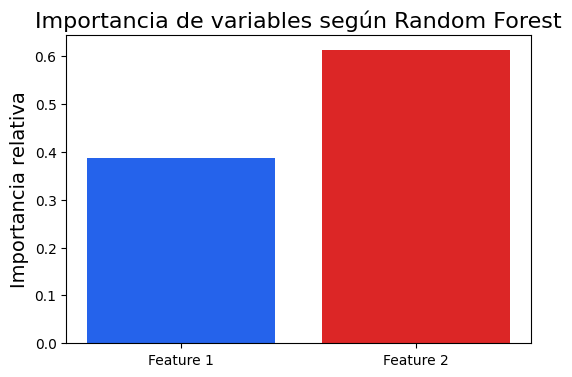

Exactitud Árbol de Decisión: 0.896
Exactitud Random Forest:    0.904


In [ ]:
# ================================================
# 1. LIBRERÍAS Y CONFIGURACIÓN
# ================================================
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons, make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

# ================================================
# 2. DATOS SINTÉTICOS (MOONS: PROBLEMA NO LINEAL)
# ================================================
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# ================================================
# 3. MODELOS: ÁRBOL DE DECISIÓN Y RANDOM FOREST
# ================================================
tree = DecisionTreeClassifier(max_depth=4, criterion='gini', random_state=42)
forest = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)

tree.fit(X_train, y_train)
forest.fit(X_train, y_train)

# ================================================
# 4. FUNCIÓN PARA FRONTERAS DE DECISIÓN
# ================================================
def plot_decision_boundary(clf, X, y, ax, title):
    cmap_bg = ListedColormap(["#bae6fd", "#fecaca"])
    cmap_pts = ListedColormap(["#2563eb", "#dc2626"])
    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap_bg, alpha=0.4)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap_pts, edgecolor="k", s=35)
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

# ================================================
# 5. VISUALIZACIÓN DE FRONTERAS
# ================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_decision_boundary(tree, X_test, y_test, axes[0], "Árbol de Decisión (profundidad=4)")
plot_decision_boundary(forest, X_test, y_test, axes[1], "Random Forest (100 árboles, prof=4)")
plt.tight_layout()
plt.show()

# ================================================
# 6. VISUALIZACIÓN DE UN ÁRBOL (opcional, muy didáctico)
# ================================================
plt.figure(figsize=(14,7))
plot_tree(tree, feature_names=["Feature 1", "Feature 2"], class_names=["Clase 0", "Clase 1"], filled=True, rounded=True, impurity=True, fontsize=10)
plt.title("Visualización interna del Árbol de Decisión")
plt.show()

# ================================================
# 7. IMPORTANCIA DE VARIABLES EN RANDOM FOREST
# ================================================
importances = forest.feature_importances_
plt.figure(figsize=(6,4))
plt.bar(["Feature 1", "Feature 2"], importances, color=["#2563eb", "#dc2626"])
plt.title("Importancia de variables según Random Forest")
plt.ylabel("Importancia relativa")
plt.show()

# ================================================
# 8. MÉTRICAS DE DESEMPEÑO
# ================================================
y_pred_tree = tree.predict(X_test)
y_pred_forest = forest.predict(X_test)

acc_tree = accuracy_score(y_test, y_pred_tree)
acc_forest = accuracy_score(y_test, y_pred_forest)

print("Exactitud Árbol de Decisión:", f"{acc_tree:.3f}")
print("Exactitud Random Forest:   ", f"{acc_forest:.3f}")


In [ ]:
# Importación de librerías necesarias
from IPython.display import display, HTML
import html

# =========================================================
# 1. BLOQUES HTML ESTÁTICOS
# =========================================================

introduction_bc_html = r"""
<div class="content-block">
    <h2>Objetivo y Contexto del Dataset</h2>
    <p>El conjunto de datos <strong>Breast Cancer Wisconsin (Diagnostic)</strong> es un recurso canónico en la comunidad de ciencia de datos, diseñado para abordar un problema de <strong>clasificación binaria</strong>: predecir si un tumor mamario es maligno (canceroso) o benigno (no canceroso). Los datos se derivan de imágenes digitalizadas de aspiraciones con aguja fina (FNA), una técnica de biopsia mínimamente invasiva.</p>
    <p>Su propósito fundamental es servir como un banco de pruebas para evaluar y comparar modelos de aprendizaje automático en un problema biomédico realista, donde la precisión, la robustez y la interpretabilidad del modelo son de suma importancia.</p>
</div>
"""

conclusion_bc_html = r"""
<div class="content-block">
    <h2>Conclusión: Más Allá de un Ejercicio Académico</h2>
    <p>El dataset Breast Cancer Wisconsin trasciende su rol como un simple ejercicio de clasificación. Representa un puente entre la teoría del aprendizaje automático y las aplicaciones clínicas de alto impacto. Trabajar con él no solo pone a prueba la capacidad predictiva de un algoritmo, sino que también nos obliga a considerar la importancia de la interpretabilidad del modelo, la gestión responsable de los datos y las implicaciones éticas de la IA en la salud.</p>
    <p>Es, en definitiva, una herramienta invaluable para entrenar a la próxima generación de científicos de datos en los desafíos y responsabilidades que conlleva aplicar la inteligencia artificial para mejorar la vida de las personas.</p>
</div>
"""

# =========================================================
# 2. DATOS PARA TARJETAS DESPLEGABLES (CONTENIDO EXPERTO)
# =========================================================
breast_cancer_cards_data = [
    {
        "titulo": r"1. Origen, Relevancia y Estructura",
        "contenido": r"""
            <h4>Origen y Repositorio</h4>
            <p>El dataset fue creado por el Dr. William H. Wolberg, de los Hospitales de la Universidad de Wisconsin, y es un pilar del <strong>UCI Machine Learning Repository</strong>. Su estatus como un dataset de referencia asegura que innumerables estudios y algoritmos han sido validados contra él, proporcionando una base sólida para la comparación de rendimiento.</p>

            <h4>Estructura del Dataset</h4>
            <ul>
                <li><strong>Número de Instancias:</strong> 569 pacientes.</li>
                <li><strong>Número de Atributos:</strong> 30 características predictoras numéricas y 1 variable objetivo.</li>
                <li><strong>Variable Objetivo (Target):</strong> <code>diagnosis</code>, una variable categórica binaria:
                    <ul>
                        <li><code>Malignant</code> (Maligno)</li>
                        <li><code>Benign</code> (Benigno)</li>
                    </ul>
                </li>
                 <li><strong>Ausencia de Valores Nulos:</strong> El dataset está pre-limpiado, lo que facilita su uso directo para el modelado.</li>
            </ul>
        """
    },
    {
        "titulo": r"2. Desglose de las Variables Predictoras",
        "contenido": r"""
            <p>Las 30 características predictoras no son independientes; describen diez propiedades morfológicas fundamentales de los núcleos celulares, y para cada una de estas propiedades se calculan tres valores estadísticos, resultando en \(10 \times 3 = 30\) variables.</p>
            <h4>Las 10 Medidas Base</h4>
            <p>Estas son las propiedades extraídas de las imágenes de los núcleos celulares:</p>
            <ol>
                <li><strong>Radius:</strong> Radio (distancia media desde el centro a los puntos del perímetro).</li>
                <li><strong>Texture:</strong> Textura (desviación estándar de los valores de la escala de grises).</li>
                <li><strong>Perimeter:</strong> Perímetro del núcleo.</li>
                <li><strong>Area:</strong> Área del núcleo.</li>
                <li><strong>Smoothness:</strong> Suavidad (variación local en las longitudes de los radios).</li>
                <li><strong>Compactness:</strong> Compacidad (perímetro² / área - 1.0).</li>
                <li><strong>Concavity:</strong> Concavidad (severidad de las indentaciones cóncavas del contorno).</li>
                <li><strong>Concave Points:</strong> Puntos cóncavos (número de porciones cóncavas del contorno).</li>
                <li><strong>Symmetry:</strong> Simetría.</li>
                <li><strong>Fractal Dimension:</strong> Dimensión fractal ("aproximación de la línea de costa" - 1).</li>
            </ol>
            <h4>Las 3 Estadísticas por Medida</h4>
            <p>Para cada una de las 10 medidas anteriores, el dataset incluye:</p>
            <ul>
                <li>La <strong>media (mean)</strong> de los valores de todas las células en la imagen.</li>
                <li>El <strong>error estándar (standard error / se)</strong> de los valores.</li>
                <li>El <strong>peor valor (worst)</strong> o el más grande, que es la media de los tres valores más grandes de esa característica.</li>
            </ul>
            <blockquote>Ejemplo: las variables <code>radius_mean</code>, <code>radius_se</code>, y <code>radius_worst</code> corresponden a las tres estadísticas calculadas para la medida base del radio.</blockquote>
        """
    },
    {
        "titulo": r"3. Relevancia y Desafíos para el Machine Learning",
        "contenido": r"""
            <p>Este dataset es un excelente campo de pruebas por varias razones que simulan desafíos del mundo real:</p>
            <ul>
                <li><strong>Alta Colinealidad:</strong> Muchas variables están fuertemente correlacionadas (ej., <code>radius_mean</code>, <code>perimeter_mean</code> y <code>area_mean</code>). Esto desafía a los modelos a manejar redundancia y es una oportunidad para aplicar técnicas de selección de características o regularización (como L1/Lasso).</li>
                <li><strong>Diferentes Escalas:</strong> Las variables tienen rangos y unidades muy diferentes (ej., el área es mucho mayor que la suavidad). Esto hace que el <strong>escalado de características</strong> (como la estandarización o normalización) sea un paso de preprocesamiento casi obligatorio para muchos algoritmos (ej., SVM, Regresión Logística).</li>
                <li><strong>Importancia de la Interpretabilidad:</strong> Al ser un problema médico, no basta con tener un modelo preciso. Es crucial poder interpretar <em>por qué</em> el modelo toma una decisión. Esto hace que sea ideal para explorar la importancia de las variables (feature importance) en modelos como Random Forest o usar herramientas como SHAP o LIME.</li>
                <li><strong>Desbalance de Clases (Leve):</strong> Aunque no es extremo, hay más casos benignos que malignos, lo que introduce la necesidad de considerar métricas de evaluación adecuadas más allá de la simple exactitud (accuracy), como la precisión, el recall, la puntuación F1 y el área bajo la curva ROC (AUC).</li>
            </ul>
        """
    },
    {
        "titulo": r"4. Aplicaciones Prácticas y Académicas",
        "contenido": r"""
            <p>El dataset sirve como base para una amplia gama de aplicaciones y estudios:</p>
            <h4>En el Diagnóstico Asistido por Computadora (CAD)</h4>
            <ul>
                <li>Entrenamiento de modelos de clasificación (Regresión Logística, SVM, Random Forest, XGBoost, Redes Neuronales) para que actúen como un "segundo par de ojos" para los patólogos.</li>
                <li>Identificación de las características morfológicas más predictivas, lo que puede guiar la investigación médica sobre los marcadores del cáncer.</li>
            </ul>
            <h4>En la Educación y la Investigación</h4>
            <ul>
                <li><strong>Enseñanza:</strong> Es una herramienta pedagógica estándar para ilustrar el flujo de trabajo completo de un proyecto de machine learning supervisado.</li>
                <li><strong>Benchmarking:</strong> Se utiliza para comparar el rendimiento de nuevos algoritmos de clasificación contra los ya establecidos.</li>
                <li><strong>Explicabilidad (XAI):</strong> Es un caso de uso perfecto para desarrollar y probar técnicas que hacen que los modelos de "caja negra" sean más transparentes para los profesionales médicos.</li>
            </ul>
        """
    },
    {
        "titulo": r"5. Consideraciones Éticas y de Implementación",
        "contenido": r"""
            <p>El uso de datos médicos, incluso anonimizados, conlleva responsabilidades éticas fundamentales.</p>
            <h4>Privacidad y Anonimato</h4>
            <p>Aunque el dataset está anonimizado, es un recordatorio de la importancia crítica de proteger la privacidad del paciente en cualquier aplicación de IA en salud, cumpliendo con regulaciones como HIPAA o GDPR.</p>

            <h4>Modelo como Herramienta de Apoyo, no de Reemplazo</h4>
            <p>Es imperativo comunicar que cualquier modelo entrenado con estos datos es una <strong>herramienta de apoyo a la decisión</strong>, no un diagnóstico definitivo. La decisión final siempre debe recaer en un profesional médico cualificado que pueda considerar el contexto completo del paciente.</p>

            <h4>Sesgo y Equidad (Fairness)</h4>
            <p>Se debe analizar si el modelo funciona igual de bien en diferentes subpoblaciones (si se dispusiera de datos demográficos). Un modelo podría tener un rendimiento sesgado si los datos de entrenamiento no son representativos de la población general.</p>

            <h4>Transparencia y Confianza</h4>
            <p>En un entorno clínico, un médico no confiará en una predicción que no puede entender. La capacidad de explicar por qué el modelo clasificó un tumor como maligno (ej., "debido a un alto valor en <code>worst_concave_points</code>") es tan importante como la predicción misma.</p>
        """
    }
]

# =========================================================
# 3. GENERADOR DE TARJETAS
# =========================================================
def generar_tarjetas_definiciones(datos):
    html_generado = []
    for seccion in datos:
        titulo_html = seccion['titulo']
        contenido_html = seccion['contenido']
        plantilla_seccion = f"""
        <div class="topic-card">
            <div class="topic-header">
                <span class="topic-title">{titulo_html}</span>
                <i class="fas fa-chevron-down expand-icon"></i>
            </div>
            <div class="topic-content">
                {contenido_html}
            </div>
        </div>
        """
        html_generado.append(plantilla_seccion)
    return "\n".join(html_generado)

contenido_dinamico_html = generar_tarjetas_definiciones(breast_cancer_cards_data)

# =========================================================
# 4. PLANTILLA GLOBAL PROFESIONAL
# =========================================================
plantilla_profesional = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{main_title}</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700;800&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg, #a7429b 0%, #d53f8c 100%);
      --bg-secondary: rgba(255, 255, 255, 0.92);
      --bg-tertiary: rgba(252, 247, 251, 0.95);
      --text-primary: #5c1b4f;
      --text-secondary: #8c3a7d;
      --text-light: #ffffff;
      --accent-primary: #d53f8c;
      --accent-secondary: #e968a3;
      --accent-gradient: linear-gradient(135deg, var(--accent-primary) 0%, var(--accent-secondary) 100%);
      --border-color: rgba(230, 200, 220, 0.9);
      --shadow-card: 0 15px 35px rgba(45, 55, 72, 0.1);
      --border-radius: 20px;
      --transition: all 0.4s cubic-bezier(0.25, 0.8, 0.25, 1);
    }}
    [data-theme="dark"] {{
      --bg-primary: linear-gradient(135deg, #3c1053 0%, #5c1b4f 100%);
      --bg-secondary: rgba(45, 23, 61, 0.85);
      --bg-tertiary: rgba(60, 31, 80, 0.8);
      --text-primary: #fce7f3;
      --text-secondary: #f3c5e5;
      --accent-primary: #f472b6;
      --accent-secondary: #f9a8d4;
      --border-color: rgba(255, 255, 255, 0.15);
      --shadow-card: 0 15px 35px rgba(0, 0, 0, 0.2);
    }}
    * {{ margin: 0; padding: 0; box-sizing: border-box; }}
    html {{ scroll-behavior: smooth; }}
    body {{ font-family: 'Inter', sans-serif; line-height: 1.8; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; }}
    .particles {{ position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }}
    .particle {{ position: absolute; border-radius: 50%; animation: float 25s infinite linear; opacity: 0; background: rgba(255, 255, 255, 0.4);}}
    @keyframes float {{ 0% {{ transform: translateY(100vh) rotate(0deg); opacity: 0; }} 10%, 90% {{ opacity: 0.4; }} 100% {{ transform: translateY(-10vh) rotate(360deg); opacity: 0; }} }}

    .container {{ max-width: 1000px; margin: 0 auto; padding: 2rem; z-index: 1; }}
    .header {{ text-align: center; margin-bottom: 3rem; position: relative; }}
    .main-title {{ font-size: clamp(2.5rem, 5vw, 4.2rem); font-weight: 800; background: var(--accent-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; background-clip: text; text-shadow: 0 0 30px rgba(255,255,255,0.3); margin-bottom: 1rem; }}

    .theme-toggle {{ position: fixed; top: 2rem; right: 2rem; width: 60px; height: 60px; border: 1px solid var(--border-color); border-radius: 50%; background: var(--bg-secondary); backdrop-filter: blur(15px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.4rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; }}
    .theme-toggle:hover {{ transform: scale(1.15) rotate(180deg); }}

    .content-block {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); padding: 2rem; margin-bottom: 2rem; }}
    .content-block h2 {{ color: var(--text-primary); margin-bottom: 1.5rem; border-bottom: 2px solid var(--accent-primary); padding-bottom: 0.5rem; }}
    .content-block p, .content-block li {{ color: var(--text-secondary); margin-bottom: 1rem; }}
    .content-block ul {{ list-style-type: '→ '; padding-left: 20px; }}

    .lesson-container {{ display: flex; flex-direction: column; gap: 1.5rem; }}
    .topic-card {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); overflow: hidden; transition: var(--transition); }}
    .topic-header {{ cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }}
    .topic-title {{ font-size: 1.4rem; font-weight: 600; color: var(--text-primary); }}
    .expand-icon {{ font-size: 1.2rem; color: var(--text-secondary); transition: var(--transition); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); color: var(--accent-primary); }}
    .topic-content {{ max-height: 0; overflow: hidden; transition: max-height 1.8s cubic-bezier(0.25, 0.8, 0.25, 1), padding 1.8s cubic-bezier(0.25, 0.8, 0.25, 1); background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 4500px; padding: 2rem; border-top: 1px solid var(--border-color); }}

    .topic-content h4 {{ color: var(--text-primary); margin-top: 1.5rem; margin-bottom: 1rem; font-size: 1.2rem; border-left: 4px solid var(--accent-primary); padding-left: 1rem; }}
    .topic-content h4:first-child {{ margin-top: 0; }}
    .topic-content p, .topic-content li {{ color: var(--text-secondary); line-height: 1.7; }}
    .topic-content ul, .topic-content ol {{ padding-left: 25px; margin-bottom: 1rem; }}
    .topic-content ol li::marker {{ font-weight: bold; color: var(--accent-primary); }}
    .topic-content ul li::marker {{ color: var(--accent-primary); }}
    .topic-content strong {{ color: var(--text-primary); font-weight: 700; }}
    .topic-content blockquote {{ border-left: 4px solid var(--accent-secondary); padding-left: 1.5rem; margin: 1.5rem 0; font-style: italic; color: var(--text-secondary); background: rgba(127, 140, 141, 0.05); border-radius: 0 8px 8px 0; padding: 1rem 1.5rem; }}

    footer {{ text-align: center; margin-top: 4rem; padding-top: 2rem; border-top: 1px solid var(--border-color); }}
    footer p {{ color: var(--text-secondary); font-size: 0.9rem; opacity: 0.8; }}
  </style>
</head>
<body data-theme="dark">
  <div class="particles" id="particles-container"></div>
  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>
  <div class="container">
    <header class="header">
      <h1 class="main-title">{main_title}</h1>
    </header>
    {introduction_html}
    <div class="lesson-container">
        {dynamic_content_html}
    </div>
    {conclusion_html}
    <footer>
      <p>{footer_text}</p>
    </footer>
  </div>
  <script>
    (function() {{
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;
        function setTheme(theme) {{
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) {{ themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }}
        }}
        const storedTheme = localStorage.getItem('theme');
        setTheme(storedTheme || 'dark');

        themeToggleButton.addEventListener('click', () => {{
            const newTheme = (bodyEl.getAttribute('data-theme') || 'dark') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        }});

        document.querySelectorAll('.topic-header').forEach(header => {{
            header.addEventListener('click', () => {{
                const card = header.parentElement;
                card.classList.toggle('open');
            }});
        }});

        const container = document.getElementById('particles-container');
        if (container) {{
            for (let i = 0; i < 30; i++) {{
                const p = document.createElement('div');
                p.className = 'particle';
                p.style.left = Math.random() * 100 + 'vw';
                const size = (Math.random() * 5 + 2);
                p.style.width = size + 'px';
                p.style.height = size + 'px';
                p.style.animationDelay = Math.random() * -20 + 's';
                p.style.animationDuration = (15 + Math.random() * 10) + 's';
                p.style.opacity = 0.6;
                container.appendChild(p);
            }}
        }}
    }})();
  </script>
</body>
</html>
"""

# =========================================================
# 5. RENDER FINAL
# =========================================================
final_html = plantilla_profesional.format(
    main_title="Análisis del Dataset: Breast Cancer Wisconsin",
    introduction_html=introduction_bc_html,
    dynamic_content_html=contenido_dinamico_html,
    conclusion_html=conclusion_bc_html,
    footer_text="Material elaborado por prof. Sergio Gevatschnaider"
)

display(HTML(final_html))

In [ ]:
# Importación de librerías necesarias
from IPython.display import display, HTML
import html

# =========================================================
# 1. BLOQUES HTML ESTÁTICOS
# =========================================================

introduction_hyperparams_html = r"""
<div class="content-block">
    <h2>Hiperparámetros: Los Controles del Algoritmo</h2>
    <p>En el aprendizaje automático, es fundamental distinguir entre dos tipos de "ajustes" del modelo. Los <strong>parámetros</strong> son valores internos que el algoritmo aprende directamente de los datos durante el entrenamiento (ej. los coeficientes \(\beta\) en una regresión lineal). En contraste, los <strong>hiperparámetros</strong> son las perillas de configuración externas que nosotros, como científicos de datos, debemos establecer <em>antes</em> de que comience el proceso de aprendizaje.</p>
    <p>Estos hiperparámetros definen la arquitectura del modelo y dictan cómo se lleva a cabo el entrenamiento. Un ajuste inadecuado puede llevar a un modelo que memoriza el ruido de los datos (sobreajuste) o a uno tan simple que no captura las señales importantes (subajuste).</p>
</div>
"""

conclusion_hyperparams_html = r"""
<div class="content-block">
    <h2>Conclusión: El Ajuste Fino como Disciplina</h2>
    <p>El ajuste de hiperparámetros es una disciplina fundamental que separa un modelo funcional de uno de alto rendimiento. Es una mezcla de ciencia (métodos sistemáticos como Grid Search) y arte (intuición sobre qué rangos explorar). Un modelo de machine learning no está completo hasta que sus hiperparámetros han sido optimizados de manera rigurosa, siempre utilizando validación cruzada para asegurar que el rendimiento evaluado sea una estimación honesta de su capacidad de generalización a datos no vistos.</p>
    <p>Dominar estas técnicas es un paso esencial para pasar de aplicar algoritmos a construir soluciones de machine learning robustas, fiables y listas para producción.</p>
</div>
"""

# =========================================================
# 2. DATOS PARA TARJETAS DESPLEGABLES (CONTENIDO EXPERTO)
# =========================================================
hyperparameter_cards_data = [
    {
        "titulo": r"1. Hiperparámetros Clave en Random Forest",
        "contenido": r"""
            <p>Random Forest es un algoritmo de ensamble potente, y su rendimiento depende críticamente del ajuste de sus hiperparámetros. A continuación se detallan los más influyentes:</p>
            <div class="table-container">
                 <table>
                    <thead><tr><th>Hiperparámetro</th><th>Descripción Detallada</th><th>Impacto en el Modelo</th></tr></thead>
                    <tbody>
                        <tr><td><strong><code>n_estimators</code></strong></td><td>El número de árboles de decisión a construir en el bosque.</td><td>Un número mayor generalmente mejora la precisión y la estabilidad, pero aumenta el costo computacional. El beneficio disminuye a partir de cierto punto.</td></tr>
                        <tr><td><strong><code>max_depth</code></strong></td><td>La profundidad máxima que puede alcanzar cada árbol individual.</td><td>Controla directamente la complejidad de los árboles. Valores más altos pueden capturar más información pero corren un alto riesgo de sobreajuste.</td></tr>
                        <tr><td><strong><code>max_features</code></strong></td><td>El número máximo de características a considerar al buscar la mejor división en un nodo.</td><td>Un valor bajo aumenta la diversidad de los árboles (reduciendo la varianza del bosque), pero puede impedir que los árboles sean lo suficientemente predictivos si se eligen malas características.</td></tr>
                        <tr><td><strong><code>min_samples_split</code></strong></td><td>El número mínimo de muestras que un nodo debe tener para ser considerado para una división.</td><td>Actúa como un regularizador. Valores más altos evitan que el modelo aprenda de regiones muy específicas (y posiblemente ruidosas) de los datos.</td></tr>
                        <tr><td><strong><code>min_samples_leaf</code></strong></td><td>El número mínimo de muestras que deben existir en un nodo hoja (terminal).</td><td>Similar a <code>min_samples_split</code>, asegura que cada predicción final se base en un número mínimo de ejemplos, suavizando el modelo.</td></tr>
                        <tr><td><strong><code>bootstrap</code></strong></td><td>Booleano que indica si se debe usar muestreo con reemplazo (bootstrap) para crear los subconjuntos de datos para cada árbol.</td><td><code>True</code> es la esencia de Random Forest (Bagging). Ponerlo en <code>False</code> hace que cada árbol use el dataset completo.</td></tr>
                    </tbody>
                </table>
            </div>
        """
    },
    {
        "titulo": r"2. Grid Search: Búsqueda Exhaustiva en Rejilla",
        "contenido": r"""
            <h4>Concepto y Metodología</h4>
            <p><strong>Grid Search</strong> (Búsqueda en Rejilla) es el método más fundamental para la optimización de hiperparámetros. Funciona definiendo una "rejilla" de valores discretos para cada hiperparámetro y luego evaluando exhaustivamente <strong>cada combinación posible</strong> de estos valores mediante validación cruzada (cross-validation).</p>
            <ul>
                <li><strong>Ventaja Principal:</strong> Exhaustividad. Si la combinación óptima se encuentra dentro de la rejilla definida, Grid Search la encontrará garantizado.</li>
                <li><strong>Desventaja Principal:</strong> Maldición de la dimensionalidad. El costo computacional crece exponencialmente con el número de hiperparámetros y valores a probar.</li>
            </ul>
            <h4>Implementación Comentada en <code>scikit-learn</code></h4>
            <div class="code-block"><pre><code>
<span class="comment"># 1. Importaciones necesarias</span>
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

<span class="comment"># 2. Carga y división de datos</span>
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<span class="comment"># 3. Definición de la rejilla de hiperparámetros a explorar</span>
param_grid = {
    'n_estimators': [50, 150],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [1, 3, 5]
}

<span class="comment"># 4. Inicialización del modelo base y GridSearchCV</span>
<span class="comment"># n_jobs=-1 utiliza todos los núcleos de CPU disponibles para acelerar la búsqueda</span>
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')

<span class="comment"># 5. Ejecución de la búsqueda sobre los datos de entrenamiento</span>
grid_search.fit(X_train, y_train)

<span class="comment"># 6. Resultados de la búsqueda</span>
print(f"Mejores hiperparámetros encontrados: {grid_search.best_params_}")
print(f"Mejor puntuación ROC AUC (validación cruzada): {grid_search.best_score_:.4f}")
</code></pre></div>
        """
    },
    {
        "titulo": r"3. Random Search: Exploración Eficiente",
        "contenido": r"""
            <h4>Concepto y Metodología</h4>
            <p><strong>Random Search</strong> (Búsqueda Aleatoria) aborda el problema del costo computacional de Grid Search. En lugar de probar todas las combinaciones, explora un número fijo de combinaciones (<code>n_iter</code>) seleccionadas al azar desde un espacio de búsqueda definido, que puede incluir distribuciones de probabilidad.</p>
            <ul>
                <li><strong>Ventaja Principal:</strong> Eficiencia. A menudo encuentra una combinación de hiperparámetros muy buena (o incluso la mejor) en una fracción del tiempo de Grid Search, especialmente cuando algunos hiperparámetros son más importantes que otros.</li>
                <li><strong>Desventaja Principal:</strong> No es exhaustivo. No hay garantía de que se explore la mejor combinación posible.</li>
            </ul>
            <h4>Implementación Comentada en <code>scikit-learn</code></h4>
            <div class="code-block"><pre><code>
<span class="comment"># 1. Importaciones adicionales (para distribuciones)</span>
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

<span class="comment"># (Se asume que los datos ya están cargados y divididos)</span>

<span class="comment"># 2. Definición del espacio de búsqueda con distribuciones</span>
param_dist = {
    'n_estimators': randint(50, 250),           <span class="comment"># Entero aleatorio entre 50 y 249</span>
    'max_depth': [5, 10, 15, 20, None],       <span class="comment"># Selección de una lista</span>
    'min_samples_leaf': randint(1, 10)          <span class="comment"># Entero aleatorio entre 1 y 9</span>
}

<span class="comment"># 3. Inicialización del modelo y RandomizedSearchCV</span>
<span class="comment"># n_iter=25 define que se probarán 25 combinaciones aleatorias</span>
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=25, cv=5, n_jobs=-1, verbose=2, scoring='roc_auc', random_state=42)

<span class="comment"># 4. Ejecución de la búsqueda</span>
random_search.fit(X_train, y_train)

<span class="comment"># 5. Resultados de la búsqueda</span>
print(f"Mejores hiperparámetros encontrados: {random_search.best_params_}")
print(f"Mejor puntuación ROC AUC (validación cruzada): {random_search.best_score_:.4f}")
</code></pre></div>
        """
    },
    {
        "titulo": r"4. Comparación Estratégica y Próximos Pasos",
        "contenido": r"""
            <h4>¿Cuándo Usar Cada Método?</h4>
            <div class="table-container">
                 <table>
                    <thead><tr><th>Criterio</th><th>Grid Search</th><th>Random Search</th></tr></thead>
                    <tbody>
                        <tr><td><strong>Espacio de Búsqueda</strong></td><td>Pequeño y discreto. Pocos hiperparámetros.</td><td>Grande, con rangos continuos o muchos hiperparámetros.</td></tr>
                        <tr><td><strong>Costo Computacional</strong></td><td>Alto, crece exponencialmente.</td><td>Controlado por el parámetro <code>n_iter</code>.</td></tr>
                        <tr><td><strong>Garantía de Optimalidad</strong></td><td>Garantiza encontrar el óptimo <em>dentro de la rejilla</em>.</td><td>No garantiza encontrar el óptimo, pero es probabilísticamente eficiente.</td></tr>
                        <tr><td><strong>Caso de Uso Ideal</strong></td><td>Ajuste final en un espacio reducido o cuando la exhaustividad es crítica.</td><td>Exploración inicial de un espacio amplio para acotar los rangos de interés.</td></tr>
                    </tbody>
                </table>
            </div>
            <h4>Más Allá de la Búsqueda Manual: Optimización Bayesiana</h4>
            <p>Un paso más allá de Grid y Random Search es la <strong>Optimización Bayesiana</strong>. Este enfoque es una búsqueda informada: utiliza los resultados de las evaluaciones anteriores para construir un modelo probabilístico que relaciona los hiperparámetros con el rendimiento. Luego, utiliza este modelo para decidir qué combinación de hiperparámetros probar a continuación, equilibrando la exploración de nuevas áreas con la explotación de áreas que ya se sabe que funcionan bien.</p>
            <p>Librerías populares como <strong>Optuna</strong>, <strong>Hyperopt</strong> y <strong>Scikit-Optimize</strong> implementan estos métodos avanzados y suelen ser mucho más eficientes que las búsquedas no informadas.</p>
        """
    }
]

# =========================================================
# 3. GENERADOR DE TARJETAS
# =========================================================
def generar_tarjetas_definiciones(datos):
    html_generado = []
    for seccion in datos:
        titulo_html = seccion['titulo']
        contenido_html = seccion['contenido']
        plantilla_seccion = f"""
        <div class="topic-card">
            <div class="topic-header">
                <span class="topic-title">{titulo_html}</span>
                <i class="fas fa-chevron-down expand-icon"></i>
            </div>
            <div class="topic-content">
                {contenido_html}
            </div>
        </div>
        """
        html_generado.append(plantilla_seccion)
    return "\n".join(html_generado)

contenido_dinamico_html = generar_tarjetas_definiciones(hyperparameter_cards_data)

# =========================================================
# 4. PLANTILLA GLOBAL PROFESIONAL
# =========================================================
plantilla_profesional = r"""
<!DOCTYPE html>
<html lang="es">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>{main_title}</title>
  <link href="https://fonts.googleapis.com/css2?family=Inter:wght@300;400;500;600;700;800&family=JetBrains+Mono:wght@400;500&display=swap" rel="stylesheet">
  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.4.0/css/all.min.css" rel="stylesheet">
  <script>
    window.MathJax = {{ tex: {{ inlineMath: [['$', '$'], ['\\(', '\\)']] }} }};
  </script>
  <script src="https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js" id="MathJax-script" async></script>
  <style>
    :root {{
      --bg-primary: linear-gradient(135deg, #1e3a8a 0%, #3b82f6 100%);
      --bg-secondary: rgba(255, 255, 255, 0.92);
      --bg-tertiary: rgba(240, 245, 255, 0.95);
      --text-primary: #1e3a8a;
      --text-secondary: #1d4ed8;
      --text-light: #ffffff;
      --accent-primary: #3b82f6;
      --accent-secondary: #60a5fa;
      --accent-gradient: linear-gradient(135deg, var(--accent-primary) 0%, var(--accent-secondary) 100%);
      --border-color: rgba(219, 234, 254, 0.9);
      --shadow-card: 0 15px 35px rgba(45, 55, 72, 0.1);
      --border-radius: 20px;
      --transition: all 0.4s cubic-bezier(0.25, 0.8, 0.25, 1);
      --code-bg: #f3f4f6;
      --code-text: #111827;
      --code-comment: #6b7280;
    }}
    [data-theme="dark"] {{
      --bg-primary: linear-gradient(135deg, #111827 0%, #1e3a8a 100%);
      --bg-secondary: rgba(30, 41, 59, 0.85);
      --bg-tertiary: rgba(51, 65, 85, 0.8);
      --text-primary: #dbeafe;
      --text-secondary: #93c5fd;
      --accent-primary: #60a5fa;
      --accent-secondary: #93c5fd;
      --border-color: rgba(255, 255, 255, 0.15);
      --shadow-card: 0 15px 35px rgba(0, 0, 0, 0.2);
      --code-bg: #1e293b;
      --code-text: #e2e8f0;
      --code-comment: #94a3b8;
    }}
    * {{ margin: 0; padding: 0; box-sizing: border-box; }}
    html {{ scroll-behavior: smooth; }}
    body {{ font-family: 'Inter', sans-serif; line-height: 1.8; background: var(--bg-primary); color: var(--text-primary); transition: var(--transition); min-height: 100vh; position: relative; overflow-x: hidden; }}
    .particles {{ position: fixed; top: 0; left: 0; width: 100%; height: 100%; pointer-events: none; z-index: -1; }}
    .particle {{ position: absolute; border-radius: 50%; animation: float 25s infinite linear; opacity: 0; background: rgba(255, 255, 255, 0.4);}}
    @keyframes float {{ 0% {{ transform: translateY(100vh) rotate(0deg); opacity: 0; }} 10%, 90% {{ opacity: 0.4; }} 100% {{ transform: translateY(-10vh) rotate(360deg); opacity: 0; }} }}

    .container {{ max-width: 1000px; margin: 0 auto; padding: 2rem; z-index: 1; }}
    .header {{ text-align: center; margin-bottom: 3rem; position: relative; }}
    .main-title {{ font-size: clamp(2.5rem, 5vw, 4.2rem); font-weight: 800; background: var(--accent-gradient); -webkit-background-clip: text; -webkit-text-fill-color: transparent; background-clip: text; text-shadow: 0 0 30px rgba(255,255,255,0.3); margin-bottom: 1rem; }}

    .theme-toggle {{ position: fixed; top: 2rem; right: 2rem; width: 60px; height: 60px; border: 1px solid var(--border-color); border-radius: 50%; background: var(--bg-secondary); backdrop-filter: blur(15px); box-shadow: var(--shadow-card); cursor: pointer; display: flex; align-items: center; justify-content: center; font-size: 1.4rem; color: var(--accent-primary); transition: var(--transition); z-index: 1000; }}
    .theme-toggle:hover {{ transform: scale(1.15) rotate(180deg); }}

    .content-block {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); padding: 2rem; margin-bottom: 2rem; }}
    .content-block h2 {{ color: var(--text-primary); margin-bottom: 1.5rem; border-bottom: 2px solid var(--accent-primary); padding-bottom: 0.5rem; }}
    .content-block p {{ color: var(--text-secondary); margin-bottom: 1rem; }}

    .lesson-container {{ display: flex; flex-direction: column; gap: 1.5rem; }}
    .topic-card {{ background: var(--bg-secondary); backdrop-filter: blur(20px); border-radius: var(--border-radius); box-shadow: var(--shadow-card); border: 2px solid var(--border-color); overflow: hidden; transition: var(--transition); }}
    .topic-header {{ cursor: pointer; padding: 1.5rem 2rem; display: flex; justify-content: space-between; align-items: center; }}
    .topic-title {{ font-size: 1.4rem; font-weight: 600; color: var(--text-primary); }}
    .expand-icon {{ font-size: 1.2rem; color: var(--text-secondary); transition: var(--transition); }}
    .topic-card.open .expand-icon {{ transform: rotate(180deg); color: var(--accent-primary); }}
    .topic-content {{ max-height: 0; overflow: hidden; transition: max-height 1.8s cubic-bezier(0.25, 0.8, 0.25, 1), padding 1.8s cubic-bezier(0.25, 0.8, 0.25, 1); background: var(--bg-tertiary); }}
    .topic-card.open .topic-content {{ max-height: 4500px; padding: 2rem; border-top: 1px solid var(--border-color); }}

    .topic-content h4 {{ color: var(--text-primary); margin-top: 1.5rem; margin-bottom: 1rem; font-size: 1.2rem; border-left: 4px solid var(--accent-primary); padding-left: 1rem; }}
    .topic-content p, .topic-content li {{ color: var(--text-secondary); line-height: 1.7; }}
    .topic-content ul, .topic-content ol {{ padding-left: 25px; margin-bottom: 1rem; }}
    .topic-content ol li::marker, .topic-content ul li::marker {{ font-weight: bold; color: var(--accent-primary); }}
    .topic-content strong {{ color: var(--text-primary); font-weight: 700; }}
    .table-container {{ overflow-x: auto; margin: 1.5rem 0; border: 1px solid var(--border-color); border-radius: 10px; }}
    table {{ width: 100%; border-collapse: collapse; }}
    th, td {{ padding: 14px 18px; border: 1px solid var(--border-color); text-align: left; }}
    thead th {{ background-color: var(--bg-tertiary); color: var(--text-primary); font-weight: 600; border-top: 0; }}
    .MathJax {{ color: var(--text-primary) !important; }}
    .code-block pre {{ background-color: var(--code-bg); color: var(--code-text); padding: 1.5rem; border-radius: 10px; overflow-x: auto; font-family: 'JetBrains Mono', monospace; font-size: 0.95em; margin: 1.5rem 0; border: 1px solid var(--border-color);}}
    .code-block pre code .comment {{ color: var(--code-comment); font-style: italic; }}

    footer {{ text-align: center; margin-top: 4rem; padding-top: 2rem; border-top: 1px solid var(--border-color); }}
    footer p {{ color: var(--text-secondary); font-size: 0.9rem; opacity: 0.8; }}
  </style>
</head>
<body data-theme="dark">
  <div class="particles" id="particles-container"></div>
  <div class="theme-toggle" id="themeToggleButton" title="Cambiar tema"><i class="fas fa-moon" id="theme-icon"></i></div>
  <div class="container">
    <header class="header">
      <h1 class="main-title">{main_title}</h1>
    </header>
    {introduction_html}
    <div class="lesson-container">
        {dynamic_content_html}
    </div>
    {conclusion_html}
    <footer>
      <p>{footer_text}</p>
    </footer>
  </div>
  <script>
    (function() {{
        const themeToggleButton = document.getElementById('themeToggleButton');
        const themeIcon = document.getElementById('theme-icon');
        const bodyEl = document.body;
        function setTheme(theme) {{
            bodyEl.setAttribute('data-theme', theme);
            localStorage.setItem('theme', theme);
            if (themeIcon) {{ themeIcon.className = theme === 'dark' ? 'fas fa-sun' : 'fas fa-moon'; }}
        }}
        const storedTheme = localStorage.getItem('theme');
        setTheme(storedTheme || 'dark');

        themeToggleButton.addEventListener('click', () => {{
            const newTheme = (bodyEl.getAttribute('data-theme') || 'dark') === 'dark' ? 'light' : 'dark';
            setTheme(newTheme);
        }});

        document.querySelectorAll('.topic-header').forEach(header => {{
            header.addEventListener('click', () => {{
                const card = header.parentElement;
                card.classList.toggle('open');
            }});
        }});

        const container = document.getElementById('particles-container');
        if (container) {{
            for (let i = 0; i < 30; i++) {{
                const p = document.createElement('div');
                p.className = 'particle';
                p.style.left = Math.random() * 100 + 'vw';
                const size = (Math.random() * 5 + 2);
                p.style.width = size + 'px';
                p.style.height = size + 'px';
                p.style.animationDelay = Math.random() * -20 + 's';
                p.style.animationDuration = (15 + Math.random() * 10) + 's';
                p.style.opacity = 0.6;
                container.appendChild(p);
            }}
        }}
    }})();
  </script>
</body>
</html>
"""

# =========================================================
# 5. RENDER FINAL
# =========================================================
final_html = plantilla_profesional.format(
    main_title="Optimización de Hiperparámetros",
    introduction_html=introduction_hyperparams_html,
    dynamic_content_html=contenido_dinamico_html,
    conclusion_html=conclusion_hyperparams_html,
    footer_text="Material elaborado por prof. Sergio Gevatschnaider"
)

display(HTML(final_html))

Hiperparámetro,Descripción Detallada,Impacto en el Modelo
n_estimators,El número de árboles de decisión a construir en el bosque.,"Un número mayor generalmente mejora la precisión y la estabilidad, pero aumenta el costo computacional. El beneficio disminuye a partir de cierto punto."
max_depth,La profundidad máxima que puede alcanzar cada árbol individual.,Controla directamente la complejidad de los árboles. Valores más altos pueden capturar más información pero corren un alto riesgo de sobreajuste.
max_features,El número máximo de características a considerar al buscar la mejor división en un nodo.,"Un valor bajo aumenta la diversidad de los árboles (reduciendo la varianza del bosque), pero puede impedir que los árboles sean lo suficientemente predictivos si se eligen malas características."
min_samples_split,El número mínimo de muestras que un nodo debe tener para ser considerado para una división.,Actúa como un regularizador. Valores más altos evitan que el modelo aprenda de regiones muy específicas (y posiblemente ruidosas) de los datos.
min_samples_leaf,El número mínimo de muestras que deben existir en un nodo hoja (terminal).,"Similar a min_samples_split, asegura que cada predicción final se base en un número mínimo de ejemplos, suavizando el modelo."
bootstrap,Booleano que indica si se debe usar muestreo con reemplazo (bootstrap) para crear los subconjuntos de datos para cada árbol.,True es la esencia de Random Forest (Bagging). Ponerlo en False hace que cada árbol use el dataset completo.
Criterio,Grid Search,Random Search
Espacio de Búsqueda,Pequeño y discreto. Pocos hiperparámetros.,"Grande, con rangos continuos o muchos hiperparámetros."
Costo Computacional,"Alto, crece exponencialmente.",Controlado por el parámetro n_iter.
Garantía de Optimalidad,Garantiza encontrar el óptimo dentro de la rejilla.,"No garantiza encontrar el óptimo, pero es probabilísticamente eficiente."


Descripción del dataset:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
   

Variables independientes (features):
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points'

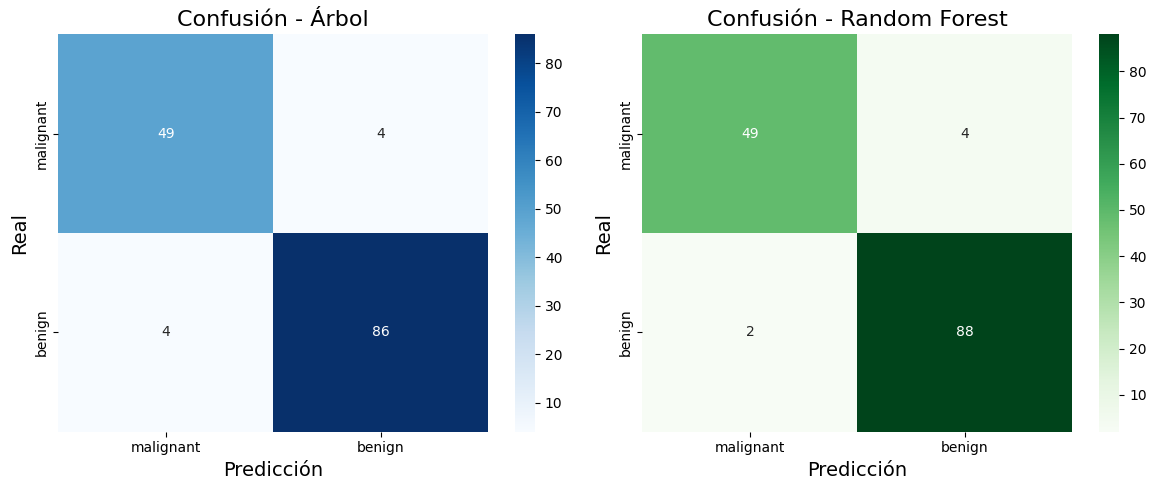

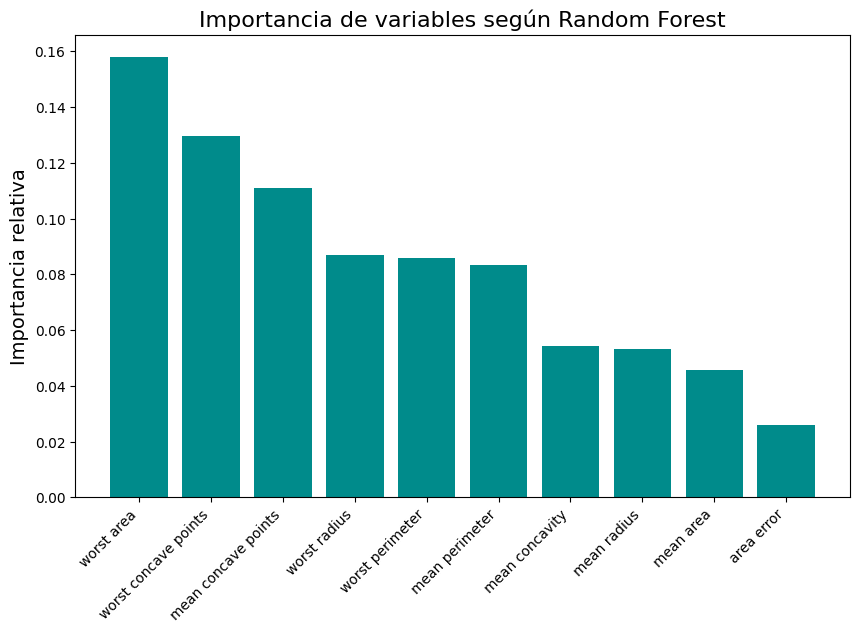

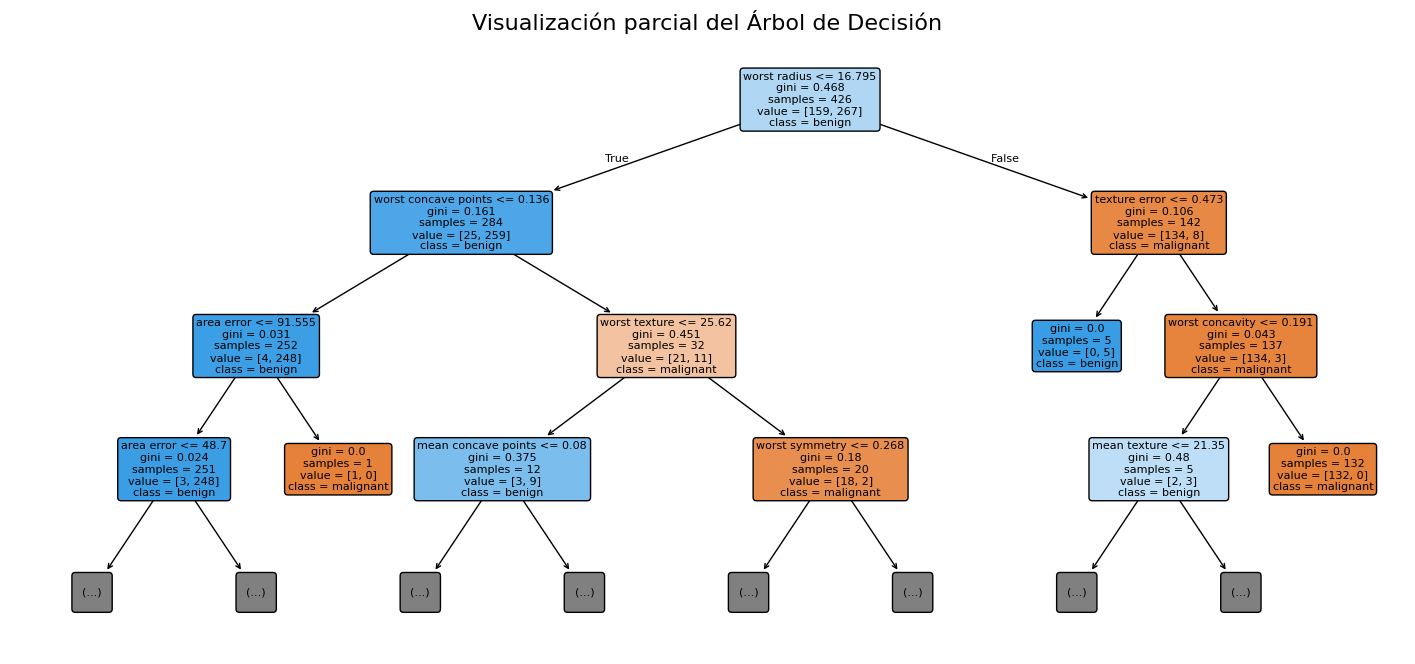

In [ ]:
# ===============================================
# 1. LIBRERÍAS Y CONFIGURACIÓN
# ===============================================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ===============================================
# 2. DESCRIPCIÓN Y EXPLORACIÓN DEL DATASET
# ===============================================
# Cargar datos reales de cáncer de mama
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

print("Descripción del dataset:")
print(data.DESCR[:800])  # Mostramos parte de la descripción

print(f"\nVariables independientes (features):\n{feature_names}")
print(f"Variable objetivo (target): {target_names}")

# Distribución de clases
unique, counts = np.unique(y, return_counts=True)
print("\nDistribución de clases:")
for u, c in zip(unique, counts):
    print(f"{target_names[u]}: {c} muestras")

# ===============================================
# 3. SEPARACIÓN EN TRAIN Y TEST
# ===============================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# ===============================================
# 4. MODELOS
# ===============================================
tree = DecisionTreeClassifier(max_depth=4, criterion='gini', random_state=42)
forest = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=42)

tree.fit(X_train, y_train)
forest.fit(X_train, y_train)

# ===============================================
# 5. DESEMPEÑO Y MATRIZ DE CONFUSIÓN
# ===============================================
def print_metrics(y_true, y_pred, label):
    print(f"\n=== {label} ===")
    print("Exactitud:", accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred, target_names=target_names))

y_pred_tree = tree.predict(X_test)
y_pred_forest = forest.predict(X_test)

print_metrics(y_test, y_pred_tree, "Árbol de Decisión")
print_metrics(y_test, y_pred_forest, "Random Forest")

# Visualización de matriz de confusión
fig, axes = plt.subplots(1, 2, figsize=(12,5))
cm_tree = confusion_matrix(y_test, y_pred_tree)
cm_forest = confusion_matrix(y_test, y_pred_forest)
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names, ax=axes[0])
axes[0].set_title("Confusión - Árbol")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")
sns.heatmap(cm_forest, annot=True, fmt='d', cmap='Greens', xticklabels=target_names, yticklabels=target_names, ax=axes[1])
axes[1].set_title("Confusión - Random Forest")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Real")
plt.tight_layout()
plt.show()

# ===============================================
# 6. IMPORTANCIA DE VARIABLES
# ===============================================
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Importancia de variables según Random Forest")
plt.bar(range(10), importances[indices[:10]], color='darkcyan', align="center")
plt.xticks(range(10), [feature_names[i] for i in indices[:10]], rotation=45, ha="right")
plt.ylabel("Importancia relativa")
plt.show()

# ===============================================
# 7. VISUALIZACIÓN DEL ÁRBOL (opcional, solo para mostrar reglas)
# ===============================================
plt.figure(figsize=(18,8))
plot_tree(tree, feature_names=feature_names, class_names=target_names, filled=True, rounded=True, max_depth=3, fontsize=8)
plt.title("Visualización parcial del Árbol de Decisión")
plt.show()


Fitting 5 folds for each of 180 candidates, totalling 900 fits

Mejor exactitud promedio en validación: 0.9648
Mejores hiperparámetros encontrados:
{'max_depth': 6, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 100}

=== Desempeño en Test ===
Exactitud: 0.958041958041958
              precision    recall  f1-score   support

   malignant       0.96      0.92      0.94        53
      benign       0.96      0.98      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



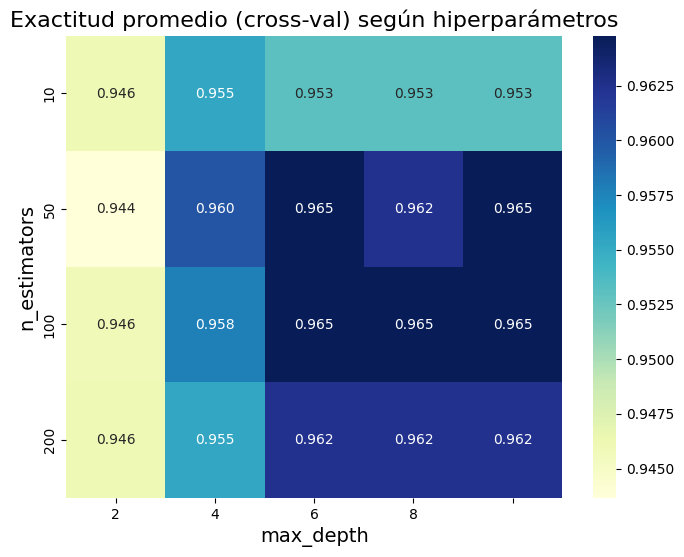

In [ ]:
# ================================================
# 1. LIBRERÍAS
# ================================================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# ================================================
# 2. CARGA Y SEPARACIÓN DE DATOS
# ================================================
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# ================================================
# 3. DEFINICIÓN DE HIPERPARÁMETROS A EXPLORAR
# ================================================
param_grid = {
    'n_estimators':   [10, 50, 100, 200],
    'max_depth':      [2, 4, 6, 8, None],
    'max_features':   ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10],
}

# ================================================
# 4. GRID SEARCH CON VALIDACIÓN CRUZADA
# ================================================
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=5,             # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

print(f"\nMejor exactitud promedio en validación: {grid_search.best_score_:.4f}")
print(f"Mejores hiperparámetros encontrados:\n{grid_search.best_params_}")

# ================================================
# 5. EVALUACIÓN EN EL CONJUNTO DE TEST
# ================================================
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("\n=== Desempeño en Test ===")
print("Exactitud:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=data.target_names))

# ================================================
# 6. ANÁLISIS VISUAL DE HIPERPARÁMETROS (OPCIONAL)
# ================================================
# Mostrar cómo varía la exactitud con n_estimators y max_depth
results = grid_search.cv_results_
scores_matrix = np.zeros((len(param_grid['n_estimators']), len(param_grid['max_depth'])))

for i, n in enumerate(param_grid['n_estimators']):
    for j, d in enumerate(param_grid['max_depth']):
        mask = (results['param_n_estimators'] == n) & (results['param_max_depth'] == d)
        scores = np.array(results['mean_test_score'])[mask]
        # Puede haber más de una combinación (por max_features, etc.), tomamos el mejor de ese subgrupo
        if scores.size > 0:
            scores_matrix[i, j] = np.max(scores)
        else:
            scores_matrix[i, j] = np.nan

plt.figure(figsize=(8,6))
sns.heatmap(
    scores_matrix,
    annot=True, fmt=".3f", cmap="YlGnBu",
    xticklabels=param_grid['max_depth'],
    yticklabels=param_grid['n_estimators']
)
plt.xlabel("max_depth")
plt.ylabel("n_estimators")
plt.title("Exactitud promedio (cross-val) según hiperparámetros")
plt.show()


Fitting 5 folds for each of 20 candidates, totalling 100 fits


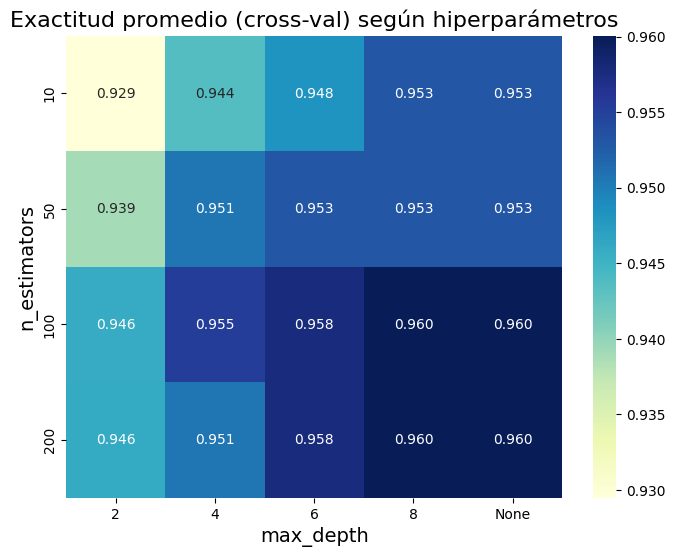

Mejor exactitud promedio (cross-val): 0.960
Mejores hiperparámetros encontrados: {'max_depth': 8, 'n_estimators': 100}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 1. Cargar y preparar los datos
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

# 2. Definir un grid sencillo para visualizar (dos hiperparámetros principales)
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [2, 4, 6, 8, None]
}

# 3. Configurar y ejecutar Grid Search
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1, return_train_score=True)
grid_search.fit(X_train, y_train)

# 4. Procesar resultados para el heatmap
results = grid_search.cv_results_

# Extraemos todas las combinaciones y las reorganizamos en una matriz para el heatmap
scores_matrix = np.zeros((len(param_grid['n_estimators']), len(param_grid['max_depth'])))
for i, n in enumerate(param_grid['n_estimators']):
    for j, d in enumerate(param_grid['max_depth']):
        # Buscamos el índice correspondiente a la combinación (n, d)
        for idx in range(len(results['params'])):
            if (results['params'][idx]['n_estimators'] == n and
                results['params'][idx]['max_depth'] == d):
                scores_matrix[i, j] = results['mean_test_score'][idx]

# 5. Visualización: Heatmap de accuracy promedio según hiperparámetros
plt.figure(figsize=(8,6))
sns.heatmap(
    scores_matrix,
    annot=True, fmt=".3f", cmap="YlGnBu",
    xticklabels=[str(v) for v in param_grid['max_depth']],
    yticklabels=param_grid['n_estimators'])
plt.xlabel("max_depth")
plt.ylabel("n_estimators")
plt.title("Exactitud promedio (cross-val) según hiperparámetros")
plt.show()

# 6. Mostrar la mejor combinación encontrada
print(f"Mejor exactitud promedio (cross-val): {grid_search.best_score_:.3f}")
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
